In [1]:
import pandas as pd
rate_df=pd.read_csv("D:/ML Master/AnalyticsVidhya/Janata Hack ML for Banking/train_fNxu4vz.csv")
rate_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [2]:
#Checking the missing values in dataset for every variable
rate_df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [3]:
#Checking attribute types
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [4]:
#Removing comma from loan amount and converting the variable in numeric type
rate_df['Loan_Amount_Requested']=rate_df['Loan_Amount_Requested'].str.replace(',','').astype('int64')

In [4]:
#Checking level for length employed attribute
rate_df.Length_Employed.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [5]:
#Making sure all numeric variables no null values
rate_df[['Loan_Amount_Requested','Annual_Income','Debt_To_Income','Inquiries_Last_6Mo','Months_Since_Deliquency','Number_Open_Accounts','Total_Accounts']].describe()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts
count,164309.00000,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000
mean,14349.33692,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665
std,8281.86870,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067
min,500.00000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000
25%,8000.00000,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000
50%,12075.00000,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000
75%,20000.00000,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000
max,35000.00000,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000


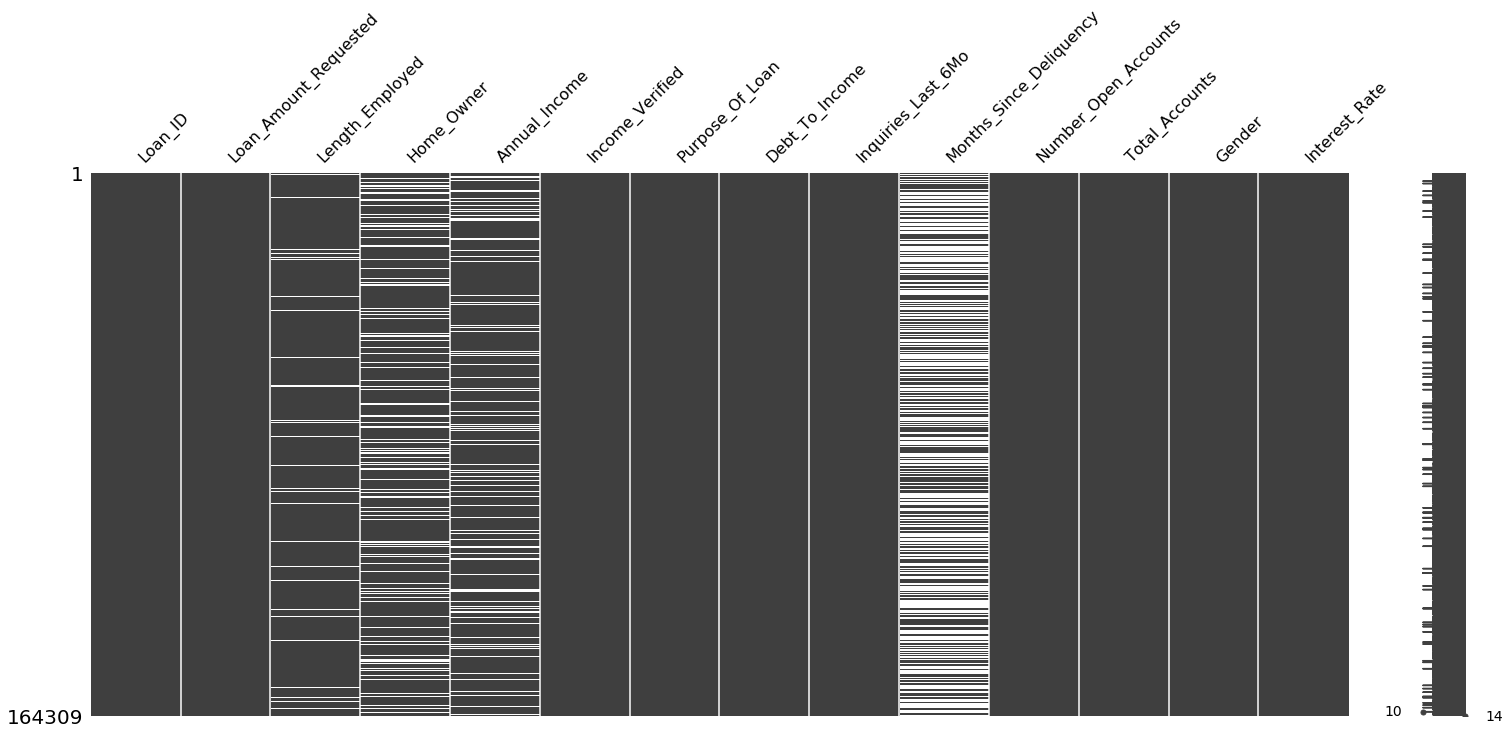

In [6]:
#Analysis the dataset for missing values
import missingno as msno
msno.matrix(rate_df)

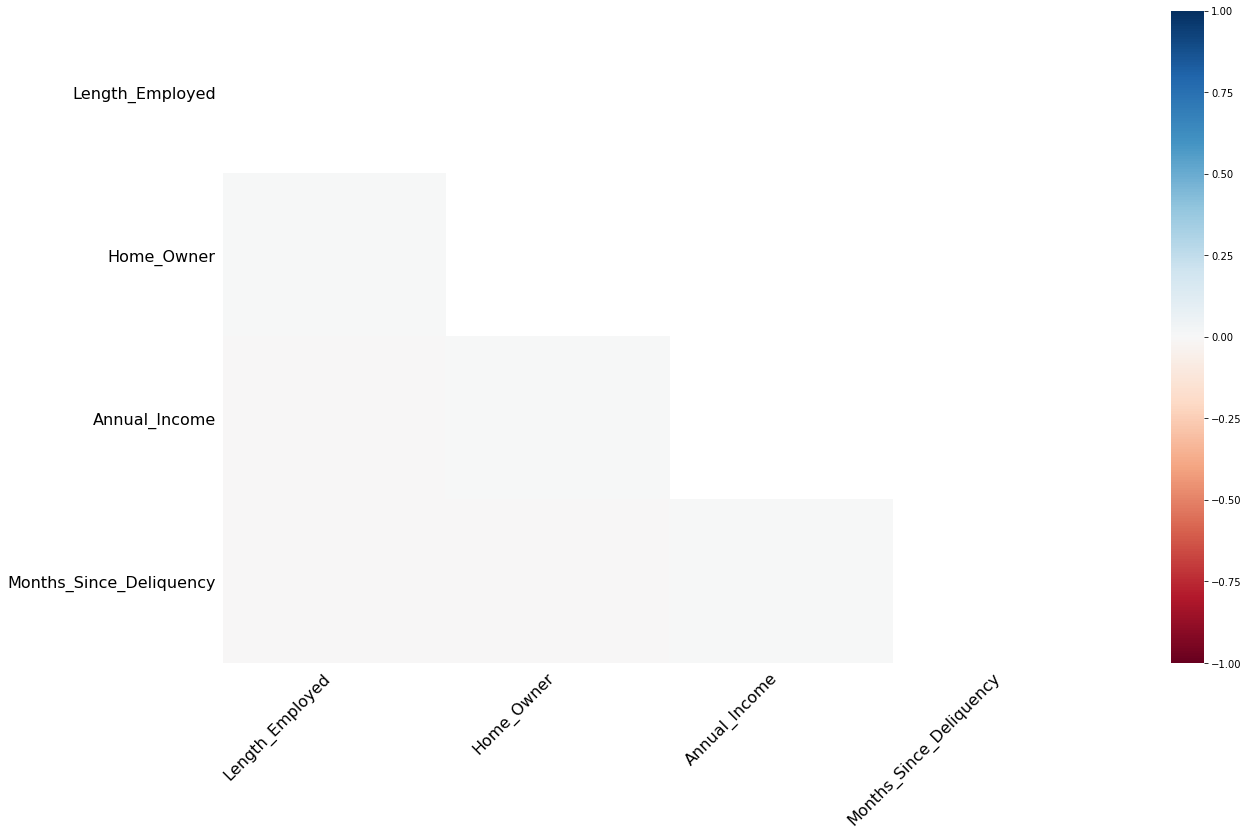

In [8]:
#Generating heatmap to identify correlation amoung missing values among features to classify them as MCAR, MNAR or MAR
msno.heatmap(rate_df)

In [7]:
#Assuming customers are non deliquent if this attribute is missing so filling missing values with zero
rate_df['Months_Since_Deliquency'].fillna(0, inplace=True)

In [8]:
#Converting gender attribute to category type
rate_df['Gender']=rate_df['Gender'].astype('category')
rate_df['Gender'].value_counts()

Male      117176
Female     47133
Name: Gender, dtype: int64

In [9]:
#Converting Purpose_Of_Loan attribute to category type and checking distinct values
rate_df['Purpose_Of_Loan']=rate_df['Purpose_Of_Loan'].astype('category')
rate_df['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [10]:
#encoding income varied variable 
rate_df['Income_Verified']=rate_df['Income_Verified'].astype('category')
rate_df['Income_Verified']=rate_df['Income_Verified'].apply(lambda x: 0 if x =='not verified' else 1 )


In [11]:
#Ensuring encoding done correctly
rate_df['Income_Verified'].value_counts()

1    112436
0     51873
Name: Income_Verified, dtype: int64

In [12]:
#Checking distinct level in length of employment variable
rate_df.Length_Employed.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [13]:
#Imputing missing values with Mode
rate_df['Length_Employed'].fillna(rate_df['Length_Employed'].mode()[0], inplace=True)
rate_df['Length_Employed'].value_counts()


10+ years    60286
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [14]:
#Imputing missing values with Mode
rate_df['Home_Owner'].fillna(rate_df['Home_Owner'].mode()[0], inplace=True)
rate_df['Home_Owner'].value_counts()

Mortgage    95694
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [15]:
#Imputing missing values with Median
rate_df['Annual_Income'].fillna(rate_df['Annual_Income'].median(), inplace=True)
rate_df['Annual_Income'].describe()

count    1.643090e+05
mean     7.175284e+04
std      5.569855e+04
min      4.000000e+03
25%      4.860000e+04
50%      6.300000e+04
75%      8.200000e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [16]:
#Checking descriptive statistics for numeric features
rate_df[['Loan_Amount_Requested','Annual_Income','Debt_To_Income','Inquiries_Last_6Mo','Months_Since_Deliquency','Number_Open_Accounts','Total_Accounts']].describe()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts
count,164309.00000,1.643090e+05,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000
mean,14349.33692,7.175284e+04,17.207189,0.781698,15.817971,11.193818,25.067665
std,8281.86870,5.569855e+04,7.845083,1.034747,22.584642,4.991813,11.583067
min,500.00000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000
25%,8000.00000,4.860000e+04,11.370000,0.000000,0.000000,8.000000,17.000000
50%,12075.00000,6.300000e+04,16.840000,0.000000,0.000000,10.000000,23.000000
75%,20000.00000,8.200000e+04,22.780000,1.000000,28.000000,14.000000,32.000000
max,35000.00000,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000


In [17]:
#Checking level for home owner attribute
rate_df['Home_Owner'].unique()


array(['Rent', 'Mortgage', 'Own', 'Other', 'None'], dtype=object)

In [18]:
#encoding dummy variables for all non numeric variables
rate_df=pd.get_dummies(rate_df, drop_first=True)
rate_df.head()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,10000001,7000,68000.0,0,18.37,0,0.0,9,14,1,...,0,0,0,0,0,0,0,0,0,0
1,10000002,30000,63000.0,1,14.93,0,17.0,12,24,3,...,0,0,0,0,0,0,0,0,0,0
2,10000003,24725,75566.4,1,15.88,0,0.0,12,16,3,...,0,0,0,0,0,0,0,0,0,1
3,10000004,16000,56160.0,1,14.34,3,0.0,16,22,3,...,0,0,0,0,0,0,0,0,0,1
4,10000005,17000,96000.0,1,22.17,1,0.0,19,30,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Setting loan_id as index for dataset
rate_df.set_index('Loan_ID')
rate_df.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Annual_Income', 'Income_Verified',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate',
       'Length_Employed_10+ years', 'Length_Employed_2 years',
       'Length_Employed_3 years', 'Length_Employed_4 years',
       'Length_Employed_5 years', 'Length_Employed_6 years',
       'Length_Employed_7 years', 'Length_Employed_8 years',
       'Length_Employed_9 years', 'Length_Employed_< 1 year',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
     

In [20]:
#Creating X as feature and y as label
import numpy as np
X=np.array(rate_df.drop(['Interest_Rate', 'Loan_ID'], axis=1))
X[0]
y=np.array(rate_df['Interest_Rate'])

In [21]:
#Scaling the features (required for machine learning models)
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale[0]

array([-0.8874035 , -0.06737783, -1.47225152,  0.14822208, -0.7554508 ,
       -0.70038831, -0.43948447, -0.95550677, -0.76127847, -0.31252067,
       -0.29279743, -0.25162793, -0.26542759, -0.24205309, -0.24505352,
       -0.2249951 , -0.19943029,  3.4397134 , -0.00780158, -0.01727158,
       -0.28726047,  1.39013163, -0.53613044, -1.20199141, -0.02714701,
       -0.24450884, -0.06875164, -0.14612363, -0.09730089, -0.07722179,
       -0.2313281 , -0.02737061, -0.12154423, -0.07155517, -0.07116747,
       -1.57672805])

In [24]:
#Spilitting data in 75% training and 25% validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scale, y, test_size=0.25, random_state=2244)

In [31]:
#Creating XGboost classifier model for classifying the labels
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='binary:logistic',
n_estimators=8, seed=2244)
xg_cl.fit(X_train, y_train)
preds_tr = xg_cl.predict(X_train)
preds = xg_cl.predict(X_test)
accuracy_train = float(np.sum(preds_tr==y_train))/y_train.shape[0]
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy Train: %f" % (accuracy_train))
print("accuracy: %f" % (accuracy))

accuracy Train: 0.537551
accuracy: 0.522080


In [27]:
preds[:10]

array([2, 3, 3, 3, 2, 2, 2, 3, 3, 3], dtype=int64)

In [58]:
#Importing libraries and loading the data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import xgboost as xgb

rate_df1=pd.read_csv("D:/ML Master/AnalyticsVidhya/Janata Hack ML for Banking/test_fjtUOL8.csv")
rate_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  109541 non-null  int64  
 1   Loan_Amount_Requested    109541 non-null  object 
 2   Length_Employed          104605 non-null  object 
 3   Home_Owner               92830 non-null   object 
 4   Annual_Income            92643 non-null   float64
 5   Income_Verified          109541 non-null  object 
 6   Purpose_Of_Loan          109541 non-null  object 
 7   Debt_To_Income           109541 non-null  float64
 8   Inquiries_Last_6Mo       109541 non-null  int64  
 9   Months_Since_Deliquency  50682 non-null   float64
 10  Number_Open_Accounts     109541 non-null  int64  
 11  Total_Accounts           109541 non-null  int64  
 12  Gender                   109541 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 10.9+ MB


In [59]:
#Repeating the data prep step 
rate_df1['Loan_Amount_Requested']=rate_df1['Loan_Amount_Requested'].str.replace(',','').astype('int64')
rate_df1['Months_Since_Deliquency'].fillna(0, inplace=True)
rate_df1['Gender']=rate_df1['Gender'].astype('category')
rate_df1['Purpose_Of_Loan']=rate_df1['Purpose_Of_Loan'].astype('category')
rate_df1['Income_Verified']=rate_df1['Income_Verified'].astype('category')
rate_df1['Income_Verified']=rate_df1['Income_Verified'].apply(lambda x: 0 if x =='not verified' else 1 )
rate_df1['Length_Employed'].fillna(rate_df1['Length_Employed'].mode()[0], inplace=True)
rate_df1['Home_Owner'].fillna(rate_df1['Home_Owner'].mode()[0], inplace=True)
rate_df1['Annual_Income'].fillna(rate_df1['Annual_Income'].median(), inplace=True)
rate_df1=pd.get_dummies(rate_df1, drop_first=True)
rate_df1.set_index('Loan_ID')

X=np.array(rate_df1.drop(['Loan_ID'], axis=1))
X[0]

X_scale=scale.transform(X)

preds_final = pd.DataFrame(xg_cl.predict(X))
loan_id=rate_df1[['Loan_ID']]



In [60]:
#creating final prediction file
predict_file=loan_id.join(preds_final)
predict_file.shape

(109541, 2)

In [62]:
#looking at final prediction file
predict_file.head()

,Loan_ID,0
0,10164310,3
1,10164311,2
2,10164312,3
3,10164313,3
4,10164314,3


In [63]:
#Saving the prediction file in local directory
predict_file.to_csv("D:/ML Master/AnalyticsVidhya/Janata Hack ML for Banking/predict_file.csv", index=False)